# 02 — Train, Predict, Evaluate  
## From Data to a First Machine Learning Model

In this notebook, we will:
- split data into **train** and **test**
- train a machine learning model
- make predictions
- evaluate how well the model performs

This is our **first complete ML workflow**.


## 1️⃣ Reminder: What Do We Already Have?

From the previous notebook:
- `X` → inputs (customer information)
- `y` → output (churn: Yes / No)

Now we want to:
> teach a model using part of this data  
> and test it using **new, unseen data**


In [2]:
import pandas as pd

# Load the dataset again (notebooks should be independent)
df = pd.read_csv("data/churn_cleaned.csv")

# Separate inputs and output
X = df.drop(columns=["Churn"])
y = df["Churn"]

print("X shape:", X.shape)
print("y shape:", y.shape)

X shape: (6990, 11)
y shape: (6990,)


## 2️⃣ Why Do We Split the Data?

If we train and test on the **same data**:
- the model may just memorize
- evaluation would be misleading

### Solution:
We split the data into:
- **Training set** → used to learn patterns
- **Test set** → used only to evaluate

The test set simulates **new customers**.


In [3]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

print("Training samples:", X_train.shape[0])
print("Test samples:", X_test.shape[0])

Training samples: 5592
Test samples: 1398


## 3️⃣ What Is a Machine Learning Pipeline?

A pipeline is a **sequence of steps**.

In our case:
1. Prepare the data (numbers + categories)
2. Train a model

Why pipelines are useful:
- no forgotten steps
- same logic during training and prediction
- perfect for saving and reusing later


In [4]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [5]:
# Identify feature types
categorical_features = X.select_dtypes(include="object").columns
numeric_features = X.select_dtypes(exclude="object").columns

print("Categorical features:", list(categorical_features))
print("Numeric features:", list(numeric_features))

Categorical features: ['gender', 'Partner', 'PhoneService', 'MultipleLines', 'InternetService', 'Contract', 'PaymentMethod']
Numeric features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [6]:
# Preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features),
        ("num", StandardScaler(), numeric_features),
    ]
)

# Full pipeline
pipeline = Pipeline(
    steps=[
        ("preprocessing", preprocessor),
        ("model", LogisticRegression(max_iter=1000))
    ]
)


## 4️⃣ Training the Model

When we call `.fit()`:
- the model looks at **inputs**
- compares them to **known outcomes**
- learns patterns that best separate churn vs non-churn

This is supervised learning.


In [7]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  Index(['gender', 'Partner', 'PhoneService', 'MultipleLines', 'InternetService',
       'Contract', 'PaymentMethod'],
      dtype='object')),
                                                 ('num', StandardScaler(),
                                                  Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object'))])),
                ('model', LogisticRegression(max_iter=1000))])

## 5️⃣ Making Predictions

After training, the model can:
- predict **Yes / No** (churn or not)
- estimate a **probability of churn**

We will look at both.


In [8]:
# Class predictions
y_pred = pipeline.predict(X_test)

# Probability predictions
y_proba = pipeline.predict_proba(X_test)

y_pred[:5], y_proba[:5]


(array(['No', 'Yes', 'Yes', 'No', 'No'], dtype=object),
 array([[0.9381702 , 0.0618298 ],
        [0.32044554, 0.67955446],
        [0.42909466, 0.57090534],
        [0.95405932, 0.04594068],
        [0.97194064, 0.02805936]]))

## 6️⃣ Accuracy (Intuition Only)

Accuracy answers the question:
> Out of all predictions, how many were correct?

Example:
- 80 correct predictions out of 100
- accuracy = 80%

⚠️ Accuracy alone can be misleading  
We will still start with it for simplicity.


In [9]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7954220314735336

## 7️⃣ Looking Beyond Accuracy

A confusion matrix shows:
- correct predictions
- wrong predictions
- *what kind* of mistakes the model makes

This helps us understand model behavior.

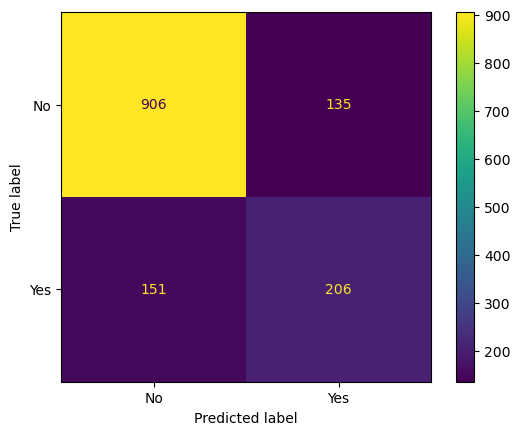

In [10]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)


## 8️⃣ Save the trained pipeline (one file)

We will save **one file** that contains:
- preprocessing steps
- trained model

So we can reuse it later in the web app without retraining.


In [11]:
from pathlib import Path
import joblib

Path("model").mkdir(exist_ok=True)

joblib.dump(pipeline, "model/churn_pipeline.joblib")
print("Saved: model/churn_pipeline.joblib")

Saved: model/churn_pipeline.joblib


## ✅ What We Learned in This Notebook 
 
- Why we split data into train and test (fair evaluation)
- How a pipeline works (preprocessing + model together)
- How a model is trained using `.fit()`
- How predictions are made (`predict` + `predict_proba`)
- How to evaluate using accuracy (and what accuracy does *not* tell us)

✅ We also saved the trained pipeline to:
- `model/churn_pipeline.joblib`

➡️ Next (Notebook 03): we will **load the saved pipeline** and connect it to a simple web app (`app.py`)